In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
import networkx as nx

In [61]:
# INITIALIZE VARIABLES
N = 200

T = 100
dt = 0.1

Kmin = 0
Kmax = 5
dK = 0.2

t = np.arange(0, T+dt, dt)
Krange = np.arange(Kmin, Kmax+dK, dK)

thetas = np.zeros((N, t.size))

f = np.zeros(N)

r = np.zeros((Krange.size,t.size))

onecol = np.ones((1,N))
onerow = np.ones((N,1))

def timer(start,end):   # Show execution time in the format "hours : minutes : seconds"
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("Execution time (h:m:s): "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [62]:
# WATTS STROGATZ:
k = 3
ps = np.array([0,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [90]:
# RUN SIMULATION
start_time = time.time()     #Initial time for execution time calculation

for p in ps:
    WS = nx.watts_strogatz_graph(N, 2*k, p)
    adj = nx.convert_matrix.to_numpy_array(WS)
    
    for j in range(Krange.size):
        K = Krange[j]
        print("K: "+str(K))
        timer(start_time, time.time())       # Time of execution

        thetas[:,0] = np.random.uniform(0,2*np.pi,(1,N))  # the initial theta values: uniformly distributed between 0 and 2pi
        omegas = np.random.normal(0,1,N) # normally distributed natural frequencies. mean 0, sd 1, size (N,1); row vector

        for i in range(0,t.size):
            m = 1/N*np.sum(np.exp(0+1j*thetas[:,i])) # order parameter
            r[j,i] = np.absolute(m) # modulus. 

            thetarow = thetas[:,i].reshape((N,1))        
            diff = np.dot(thetarow,onecol) - np.dot(onerow,thetarow.reshape((1,N)))       
            neighbor_diff = np.multiply(adj,diff)

            temp = np.sum(np.sin(diff), axis=0)

            f = omegas + K/N*temp

            if i >= t.size-1:
                break
            thetas[:,i+1] = thetas[:,i] + dt * f 
            nx.set_node_attributes(WS, dict(zip(range(N), thetas)), "theta")



    print("Code finished.")
    timer(start_time, time.time())       # Time of execution

    # SAVE FILE
    timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

    np.savetxt("WS_r_data_p="+str(p)+"_"+timestring+".csv", r, delimiter=",")

In [88]:
# LOAD FILE
filename0 = "WS_r_data_p=0.0_2021-01-27_23-26-54.csv"
filename05 = "WS_r_data_p=0.05_2021-01-27_23-27-22.csv"
filename1 = "WS_r_data_p=0.1_2021-01-27_23-27-48.csv"
filename2 = "WS_r_data_p=0.2_2021-01-27_23-28-21.csv"
filename3 = "WS_r_data_p=0.3_2021-01-27_23-28-47.csv"
filename4 = "WS_r_data_p=0.4_2021-01-27_23-29-14.csv"
filename5 = "WS_r_data_p=0.5_2021-01-27_23-29-43.csv"
filename6 = "WS_r_data_p=0.6_2021-01-27_23-30-10.csv"
filename7 = "WS_r_data_p=0.7_2021-01-27_23-30-36.csv"
filename8 = "WS_r_data_p=0.8_2021-01-27_23-31-06.csv"
filename9 = "WS_r_data_p=0.9_2021-01-27_23-31-33.csv"
filename10 = "WS_r_data_p=1.0_2021-01-27_23-32-02.csv"

filenames = np.array([filename0, filename05,filename1,filename2,filename3,filename4,filename5,filename6,filename7,filename8,filename9,filename10])

rsaved=np.zeros((filenames.size, Krange.size,t.size))

for i in range(filenames.size):
    rsaved[i,:,:] = np.loadtxt(filenames[i], delimiter=',')


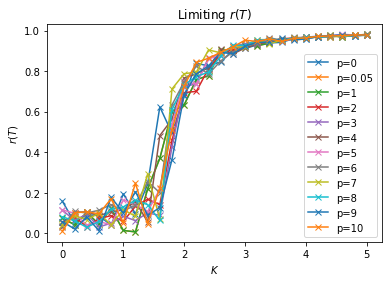

Code finished.


In [89]:
rinf = rsaved9[:,-1]  # last element is r_inf = r(T)
# (K,r(T)) PLOT FROM SAVED FILE
# NOTE that Krange is not specified in the saved file!

plt.plot(Krange, rsaved[0,:,-1] ,'-x',label="p="+str(0))
plt.plot(Krange, rsaved[1,:,-1] ,'-x',label="p="+str(0.05))

for i in range(1,11):
    plt.plot(Krange, rsaved[i,:,-1] ,'-x',label="p="+str(i))


plt.title("Limiting "+r'$r(T)$')
plt.xlabel(r'$K$')
plt.ylabel(r'$r(T)$')
plt.legend()

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("Limiting_r_ALL_p"+timestring+".png", dpi=600)    
plt.show()
print("Code finished.")

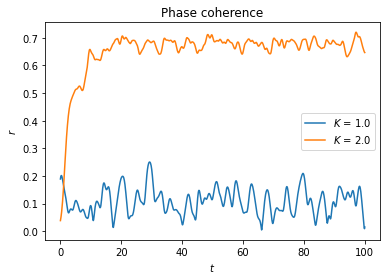

Code finished.


In [60]:
# (t,r) PLOT FROM SAVED FILE
# NOTE that Krange is not specified in the saved file!

for j in range(Krange.size):
    K=round(Krange[j],1)
    if K== 1 or K==2:
        plt.plot(t,rsaved[j,:],label=r'$K$'+" = "+str(K))
    
plt.title('Phase coherence')
plt.xlabel(r'$t$')
plt.ylabel(r'$r$')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 8},ncol=2)
plt.legend()

timestring = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

plt.savefig("Phase_coherence"+timestring+".png", dpi=600, bbox_inches='tight')    
plt.show()
print("Code finished.")